# **Práctica 2 (25% nota final): Tipologia y ciclo de vida de los datos**

En esta práctica se elabora un caso práctico orientado a aprender a identificar los datos relevantes para un proyecto analítico y usar las herramientas de integración, limpieza, validación y análisis de los mismos. Para realizar esta práctica se requiere trabajar en grupos de dos personas.
La entrega de esta práctica se ha de realizar según lo especificado en el apartado Formato y fecha de entrega. Se debe entregar una memoria PDF con las respuestas a los diferentes apartados, un repositorio con el código fuente y un vídeo explicativo, en el que ambos integrantes del grupo comenten los aspectos más relevantes del proyecto.

## **Competencias**
En esta práctica se desarrollan las siguientes competencias del Máster de Data Science:

● Capacidad de analizar un problema en el nivel de abstracción adecuado a cada situación y aplicar las habilidades y conocimientos adquiridos para abordarlo y resolverlo.  
● Capacidad para aplicar las técnicas específicas de tratamiento de datos (integración, transformación, limpieza y validación) para su posterior análisis.  

## **Objetivos**
Los objetivos concretos de esta práctica son:

● Aprender a aplicar los conocimientos adquiridos y su capacidad de resolución de problemas en entornos nuevos o poco conocidos dentro de contextos más amplios o multidisciplinares.  
● Saber identificar los datos relevantes y los tratamientos necesarios (integración, limpieza y validación) para llevar a cabo un proyecto analítico.  
● Aprender a analizar los datos adecuadamente para abordar la información contenida en los datos.  
● Identificar la mejor representación de los resultados para aportar conclusiones sobre el problema planteado en el proceso analítico.    
● Actuar con los principios éticos y legales relacionados con la manipulación de datos en función del ámbito de aplicación.  
● Desarrollar las habilidades de aprendizaje que les permitan continuar estudiando de un modo que tendrá que ser en gran medida autodirigido o autónomo.  
● Desarrollar la capacidad de búsqueda, gestión y uso de información y recursos en el ámbito de la ciencia de datos.  

## **Descripción de la Práctica a realizar**
El objetivo de esta actividad será el tratamiento del dataset creado en la Práctica 1.
Importante: el dataset debe contar con una amplia variedad de datos numéricos y categóricos, entre los que se encuentre al menos una variable objetivo, así como contar con datos faltantes y/o erróneos, para poder realizar un análisis más rico y poder responder a las diferentes preguntas planteadas en el enunciado de la práctica. De no ser así, se deberá buscar la forma de integrar más datos que cumplan con estos requisitos en la etapa de integración (apartado 2).

Siguiendo las principales etapas de un proyecto analítico, las diferentes tareas a realizar (y justificar) son las siguientes:

In [43]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Registro de la Flota Pesquera Española: Características y Distribución**
## **1. Contexto**
Este conjunto de datos recoge información técnica y administrativa de los buques registrados en el Registro de la Flota Pesquera Española, a partir de identificadores únicos (CFR) extraídos del registro europeo. Cada buque está identificado de forma unívoca, lo que garantiza la trazabilidad y evita duplicidades.  

Los datos cubren un período comprendido entre el 31 de diciembre de 1987 y el 25 de marzo de 2025, lo que permite realizar un análisis detallado y evolutivo de la flota pesquera española durante casi cuatro décadas. Esta información es fundamental para comprender la composición, características técnicas, distribución geográfica y evolución operativa de la flota.  

Es importante resaltar que con el fin de evitar redundancias con respecto a la práctica anterior, en la que ya se aplicó una preselección de los datos, se ha integrado el contenido del apartado 2 del enunciado de la práctica en este primer punto. En dicha práctica se filtraron los registros para incluir únicamente los buques españoles con código CFR válido, lo que constituye la base del conjunto de datos actual.  

Para el análisis se ha realizado una selección de las variables más relevantes, en función de los objetivos planteados: analizar la estructura de la flota, identificar patrones de distribución del número de buques entre modalidades de pesca, y detectar posibles tendencias históricas en la baja o modernización de buques.  

Las variables incluidas en el conjunto de datos son las siguientes:
- CFR: Código de Referencia Comunitario (identificador único del buque).
- Nombre: Nombre registrado del buque.
- IMO: Número de identificación internacional del buque (si aplica).
- IRCS: Código de llamada internacional (señal de radio).
- Matrícula: Código de identificación nacional del buque.
- Alta en RGFP: Fecha de alta en el Registro General de la Flota Pesquera.
- Estado: Situación administrativa (activo, baja definitiva, etc.).
- Eslora total: Longitud total en metros.
- Arqueo GT: Arqueo bruto (volumen interior).
- Potencia: Potencia del motor en kilovatios (y caballos de vapor entre paréntesis).
- Material del casco: Tipo de material constructivo (ej. madera, acero).
- Puerto base: Localidad y provincia de registro.
- Administración responsable del Registro: Organismo responsable del registro.
- Censo por modalidad: Tipo de arte o modalidad de pesca asignada (ej. cerco, palangre).
- Capacidad del buque no aportable por: Campo que indica si hay datos no disponibles.
- Tipo de auxiliar: Especifica si el buque es auxiliar y su tipo.


La selección de este subconjunto está justificada por su relevancia directa para los objetivos del análisis y por la calidad y disponibilidad de los datos. Estas variables permiten realizar distintos tipos de análisis: técnicos, geográficos, históricos o funcionales.  





In [44]:
# Librerias
import pandas as pd
import os
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from datetime import datetime

In [45]:
# Definir base_dir como ruta absoluta usando raw string
#base_dir = r"C:\Users\jubeda2\Documents\GitHub\tipologia_PR2"
#file_path = os.path.join(base_dir, "data", "datos_buques_ESP.csv")

# Leer el CSV
data = pd.read_csv("../data/datos_buques_ESP.csv")


In [46]:
data.head(5)

,CFR,Nombre,IMO,IRCS,Matrícula,Alta en RGFP,Estado,Eslora total,Arqueo GT,Potencia,Material del casco,Puerto base,Administración responsable del Registro,Censo por modalidad,Capacidad del buque no aportable por:,Tipo de auxiliar
0,ESP000000001,ARGOÑOS,-,EA7682,3ST-4-2467,10/05/1989,Baja Definitiva (desde el 02/12/1998),"0,00 m","52,70","202,26 kW (275,0 CV)",Madera,"21250 - Vicedo, LUGO (GALICIA)",Secretaría General de Pesca,CERCO EN CANTABRICO NW,NaN,NaN
1,ESP000000002,MARIA INSOLINA,-,EB6932,3ST-4-2181,10/05/1989,Baja Definitiva (desde el 30/06/1990),"10,75 m","0,00","35,30 kW (48,0 CV)",Madera,"13400 - Santander, CANTABRIA",Secretaría General de Pesca,ARTES MENORES EN CANTABRICO NW,NaN,NaN
2,ESP000000003,MOWINKEL II,-,-,3ST-4-2500,10/05/1989,Baja Definitiva (desde el 16/02/2005),"11,25 m","6,76","44,13 kW (60,0 CV)",Madera,43100 - Ceuta,Secretaría General de Pesca,PALANGRE DE FONDO EN CANTABRICO NW,NaN,NaN
3,ESP000000004,JULIA NUMERO TRES,-,-,3ST-4-2281,10/05/1989,Baja Definitiva (desde el 26/08/1994),"0,00 m","0,00","44,13 kW (60,0 CV)",Madera,"13400 - Santander, CANTABRIA",Secretaría General de Pesca,VOLANTA EN CANTABRICO NW,NaN,NaN
4,ESP000000005,SIEMPRE HERMANOS EZQUIAGA,-,EA6583,3ST-4-2540,10/05/1989,Baja Definitiva (desde el 15/11/2006),"19,60 m","40,00","169,16 kW (230,0 CV)",Madera,"12200 - Bermeo, BIZKAIA (PAÍS VASCO)",Secretaría General de Pesca,ARTES MENORES EN CANTABRICO NW,NaN,NaN


Este análisis está diseñado para responder a preguntas como:

- ¿Cómo ha evolucionado la flota pesquera española en términos de número de buques desde los años 80 hasta hoy?
- ¿Cómo ha evolucionado la flota pesquera española en términos de eslora, arqueo y potencia desde los años 80 hasta hoy?
> ¿Existen patrones asociados a la baja de buques según sus características (tamaño, antigüedad, material, etc.)?
> ¿Existen patrones asociados a la pertenencia de un censo por modalidad según sus características (tamaño, antigüedad, material, etc.)?

El estudio es de gran utilidad tanto para investigadores como para responsables de políticas públicas, ya que permite identificar tendencias, evaluar la sostenibilidad del esfuerzo pesquero (expresado en tamaño, potencia y capacidad de los buques) y orientar decisiones en materia de ordenación y modernización del sector.

## **2. Preparación y limpieza inicial de los datos**
### **2.1. Revisión de duplicados**
No se han encontrado valores duplicados en el dataset. Para verificarlo, se ha comprobado la aparición de los códigos CFR (Community Fishing Fleet Register), identificadores únicos de cada buque en el ámbito europeo. Dado que cada CFR es único, pueden utilizarse como clave primaria en nuestra tabla.


In [47]:
data['CFR'].duplicated().sum()

np.int64(0)

### **2.2. Identificación de caracteres especiales, valores vacíos y/o nulos**
Las columnas con valores problemáticos son: ‘Tipo de auxiliar’, ‘Capacidad del buque no aportable por:’, ‘IMO’, ‘IRCS’, ‘Censo por modalidad’, ‘Material del casco’, ‘Potencia’, ‘Arqueo GT’ y ‘Eslora total’.  

- La columna ‘Tipo de auxiliar’ está completamente vacía (valores nulos) o contiene caracteres especiales (como guiones), por lo que puede eliminarse directamente.  

- ‘Capacidad del buque no aportable por:’ tiene más del 99% de valores nulos, por lo que también puede eliminarse.
En ‘IMO’ y ‘IRCS’ son dos identificadores del buque que contienen casi en su totalidad (> 80 %) carácteres especiales (guiones principalmente) sin aportar información, por lo que podrían eliminarse. Nos quedaremos con el CFR como identificador único del buque.  

- ‘Censo por modalidad’ contiene unos 2297 registros con carácteres especiales, en concreto (-) y un valor nulo. Puesto que esta columna será procesada para obtener el arte, dichos registros serán agrupados en una categoría de 'Otros', puesto que un buque debe estar registrado en un censo.  

- ‘Material del casco’ muestra muy pocos registros con carácteres especiales, en concreto (-) y se procederá a su agrupación en una categoría 'Otros'.  

- Las columnas ‘Potencia’, ‘Arqueo GT’ y ‘Eslora total’ muestran en torno a 2000 registros con valor 0, lo cual parece ilógico (un buque no puede tener una eslora total de 0 m, ni una capacidad o arqueo de 0 toneladas, ni una potencia del motor de 0 kw).
En los siguientes apartados, estos valores serán imputados según el método especificado.


In [48]:
def resumen_nulos_vacios_y_ceros(data):
    def es_cero(x):
        if pd.isna(x):
            return False
        x_str = str(x).strip().lower()
        match = re.search(r'[\d.,]+', x_str)
        if not match:
            return False
        num = match.group().replace(',', '.')
        try:
            return float(num) == 0.0
        except:
            return False

    resumen = pd.DataFrame({
        'total': data.shape[0],
        'nulos': data.isnull().sum(),
        'vacios': (data == '').sum(),
        'solo_espacios': data.apply(lambda col: col.apply(lambda x: isinstance(x, str) and x.strip() == '')).sum(),
        'solo_caracteres_especiales': data.apply(lambda col: col.apply(lambda x: bool(re.fullmatch(r"[\W_]+", str(x).strip())))).sum(),
        'ceros': data.apply(lambda col: col.apply(es_cero)).sum()
    })
    resumen['total_afectados'] = resumen[['nulos', 'vacios', 'solo_espacios', 'solo_caracteres_especiales', 'ceros']].sum(axis=1)
    return resumen

# Llamar a la función actualizada
resumen_anomalias = resumen_nulos_vacios_y_ceros(data)

# Mostrar resumen ordenado
print(resumen_anomalias.sort_values(by='total_afectados', ascending=False))


                                         total  nulos  vacios  solo_espacios  \
Tipo de auxiliar                         27364  27363       0              0   
Capacidad del buque no aportable por:    27364  27220       0              0   
IMO                                      27364      0       0              0   
IRCS                                     27364      0       0              0   
Potencia                                 27364      0       0              0   
Arqueo GT                                27364      0       0              0   
Censo por modalidad                      27364      1       0              0   
Eslora total                             27364      0       0              0   
Material del casco                       27364      0       0              0   
CFR                                      27364      0       0              0   
Matrícula                                27364      0       0              0   
Nombre                                  

### **2.3. Simplificación del nombre de las columnas**
Se han simplificado y estandarizado los nombres de las columnas del dataset para facilitar la escritura y lectura del código al eliminar espacios, tildes y caracteres especiales, permitiéndonos trabajar más eficientemente con funciones automatizadas o en bucles. Además, con esto se mejora la legibilidad, reduce errores y hace que el código sea más limpio, profesional y fácil de mantener, especialmente en proyectos colaborativos como el presente.   

La simplificación ha sido:
   - 'CFR': 'cfr',
   -  'Nombre': 'nombre',
   -  'Matrícula': 'matrícula',
   -  'Alta en RGFP': 'fc_alta_rgfp',
   -  'Estado': 'estado',
   -  'Eslora total': 'eslora_total',
   -  'Arqueo GT': 'arqueo_gt',
   -  'Potencia': 'potencia',
   -  'Material del casco': 'material_casco',
   -  'Puerto base': 'puerto_base',
   -  'Administración responsable del Registro': 'admin_registro',
   -  'Censo por modalidad': 'censo_modalidad',
   -  'Tipo de auxiliar' : 'tipo_auxiliar',
   -  'Capacidad del buque no aportable por:' : 'capacidad_no_aportable',
   -  'Material del casco' : 'material_casco',
   -  'IMO' : 'IMO',
   -  'IRCS': 'IRCS'


In [49]:
columnas_simplificadas = {
    'CFR': 'cfr',
    'Nombre': 'nombre',
    'Matrícula': 'matricula',
    'Alta en RGFP': 'fc_alta_rgfp',
    'Estado': 'estado',
    'Eslora total': 'eslora_total',
    'Arqueo GT': 'arqueo_gt',
    'Potencia': 'potencia',
    'Material del casco': 'material_casco',
    'Puerto base': 'puerto_base',
    'Administración responsable del Registro': 'admin_registro',
    'Censo por modalidad': 'censo_modalidad',
    'Tipo de auxiliar' : 'tipo_auxiliar',
    'Capacidad del buque no aportable por:' : 'capacidad_no_aportable',
    'Material del casco' : 'material_casco',
    'IMO' : 'IMO',
    'IRCS': 'IRCS'
}

data = data.rename(columns=columnas_simplificadas)

### **2.4. Corrección de errores de tipo de dato (1)**

La limpieza y conversión de las columnas ‘eslora_total’, ‘arqueo_gt’ y ‘potencia’ fueron necesarias para garantizar una correcta interpretación y análisis de los datos. Originalmente, estas columnas estaban almacenadas como texto (object) debido a varias inconsistencias en su formato. Por ejemplo, ‘eslora_total’ y ‘arqueo_gt’ incluían unidades de medida como 'm' o caracteres no numéricos, y usaban comas , como separador decimal en lugar del punto (.) que Python espera para tratar valores numéricos. Esto impedía realizar cálculos o análisis estadísticos directamente.  

En el caso de la columna ‘potencia’, el problema era aún más complejo: contenía información duplicada en diferentes unidades, como '202,26 kW (275,0 CV)', lo que requería extraer y estandarizar los valores en una sola unidad (por ejemplo, kilovatios). 


In [50]:
# Función para limpiar columnas numéricas con texto, unidades y comas
def limpiar_y_convertir_num(col):
    return (
        col.astype(str)  # Asegura que todo sea string
        .str.replace(r'[^\d,.-]', '', regex=True)  # Elimina letras y unidades
        .str.replace(',', '.', regex=False)  # Sustituye comas por puntos como separador decimal
        .replace('', np.nan)  # Reemplaza strings vacíos por NaN
        .astype(float)  # Convierte a float
    )

In [51]:
# Aplicar la limpieza a las columnas indicadas
data['eslora_total'] = limpiar_y_convertir_num(data['eslora_total'])
data['arqueo_gt'] = limpiar_y_convertir_num(data['arqueo_gt'])

# Para 'potencia', primero extraemos solo el número principal (antes de paréntesis o texto)
data['potencia_kw'] = (
    data['potencia']
    .astype(str)
    .str.extract(r'([\d,.]+)')  # Extrae solo el primer número
    [0]
    .str.replace(',', '.', regex=False)
    .astype(float)
)


In [52]:
column_list = ['eslora_total', 'arqueo_gt', 'potencia_kw']
for col_name in column_list:
    print(f"Valores únicos en '{col_name}':")
    print(data[col_name].unique())
    print(f"Tipo de dato: {data[col_name].dtype}")
    print("-" * 20)

Valores únicos en 'eslora_total':
[ 0.   10.75 11.25 ... 75.05 46.85 86.1 ]
Tipo de dato: float64
--------------------
Valores únicos en 'arqueo_gt':
[  52.7     0.      6.76 ... 2498.     57.46 4290.  ]
Tipo de dato: float64
--------------------
Valores únicos en 'potencia_kw':
[ 202.26   35.3    44.13 ... 4000.    261.03  776.  ]
Tipo de dato: float64
--------------------


### **2.5. Corrección de errores de tipo de dato (2)**
La conversión de la columna ‘alta_rgfp’ a tipo fecha es necesaria porque originalmente los valores estaban almacenados como texto (object), lo que impedía aprovechar las funcionalidades específicas que ofrece Python para trabajar con fechas. Este campo representa la fecha de alta en el Registro General de la Flota Pesquera, una información temporal clave para análisis cronológicos, cálculos de antigüedad, o filtrado por rangos de fechas.


In [53]:
# Convertir columna alta_rgfp a datetime
data['fc_alta_rgfp'] = pd.to_datetime(data['fc_alta_rgfp'], dayfirst=True, errors='coerce')

## **3. Transformación estructural del dataset**
### **3.1. Descomposicion de columnas**
#### **3.1.1. ‘estado’ en dos: ‘estado_rgfp’ y ‘fc_estado’**
La separación de la columna ‘estado’ en dos columnas distintas, ‘estado_rgfp’ y ‘fc_estado’, es necesaria para mejorar la claridad, la estructura y la utilidad de la información contenida en esa variable.  

Originalmente, la columna ‘estado’ combinaba dos tipos de datos diferentes: por un lado, una categoría del estado administrativo del buque (por ejemplo, “Baja Definitiva”) y, por otro, una fecha asociada a ese estado (por ejemplo, “(desde el 02/12/1998)”). Esta mezcla dificulta el análisis automatizado, ya que impide utilizar la fecha como un dato temporal y el estado como una etiqueta categórica independiente.


In [54]:
# Extraer estado base (antes del paréntesis) y fecha contenida (si existe)
# Estado principal (sin paréntesis)
data['estado_rgfp'] = data['estado'].str.extract(r'^([^\(]+)').iloc[:, 0].str.strip()

# Extraer fecha en formato dd/mm/yyyy desde la columna estado
data['fc_estado'] = pd.to_datetime(
    data['estado'].str.extract(r'(\d{2}/\d{2}/\d{4})')[0],
    dayfirst=True,
    errors='coerce'
)

#### **3.1.2. ‘puerto_base’ en cuatro: ‘codigopostal’, ‘puerto’, ‘provincia’ y ‘comunidad atutonoma’**

En ‘puerto_base’, varios datos (código postal, puerto, provincia y comunidad autónoma) estaban combinados en una sola cadena. Esto impide realizar análisis geográficos detallados o agrupar los registros por nivel administrativo. Separar estos elementos en columnas individuales permite normalizar la información y facilitar operaciones como filtrado, agrupación o visualización por comunidad o provincia.


In [55]:
# Lista con las provincias españolas
provincias = [
    'A Coruña', 'Álava', 'Albacete', 'Alicante', 'Almería', 'Asturias', 'Ávila', 'Badajoz',
    'Barcelona', 'Burgos', 'Bizkaia', 'Cáceres', 'Cádiz', 'Cantabria', 'Castellón',
    'Ciudad Real', 'Córdoba', 'Cuenca', 'Girona', 'Granada', 'Guadalajara',
    'Gipuzkoa', 'Huelva', 'Huesca', 'Illes balears', 'Jaén', 'La Coruña',
    'La Rioja', 'Las Palmas', 'León', 'Lérida', 'Lugo', 'Madrid', 'Málaga',
    'Murcia', 'Navarra', 'Orense', 'Palencia', 'Pontevedra', 'Salamanca',
    'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Soria', 'Tarragona',
    'Teruel', 'Toledo', 'Valencia', 'Valladolid', 'Vizcaya', 'Zamora', 'Zaragoza',
    'Ceuta', 'Melilla'
]

# Lista con las comnidades autonomas españolas
comunidades_autonomas = [
    'Andalucía', 'Aragón', 'Asturias', 'Illes balears', 'Canarias', 'Cantabria',
    'Castilla-La Mancha', 'Castilla y León', 'Cataluña', 'Comunitat Valenciana',
    'Extremadura', 'Galicia', 'Madrid', 'Murcia', 'Navarra', 'La Rioja',
    'País Vasco', 'Ceuta', 'Melilla'
]


In [56]:
# Función para extraer la información
def extraer_info(puerto_base):
    codigo_postal = None
    puerto = None
    provincia = None
    comunidad = None

    if pd.isna(puerto_base):
        return pd.Series([codigo_postal, puerto, provincia, comunidad])

    # Extraer código postal (primeros 5 dígitos)
    match_cp = re.match(r'(\d{5})\s*-\s*(.*)', puerto_base)
    if match_cp:
        codigo_postal = match_cp.group(1)
        resto = match_cp.group(2).strip()
    else:
        resto = puerto_base.strip()

    # Buscar comunidad y provincia
    comunidad = next((c for c in comunidades_autonomas if c.upper() in resto.upper()), None)
    provincia = next((p for p in provincias if p.upper() in resto.upper()), None)

    # Eliminar contenido entre paréntesis
    resto = re.sub(r'\s*\(.*?\)', '', resto).strip()

    # Extraer el nombre del puerto (antes de la coma, si hay)
    if ',' in resto:
        puerto = resto.split(',')[0].strip()
    else:
        puerto = resto.strip()

    # Casos especiales como Ceuta, Melilla (son ciudad, provincia y CCAA al mismo tiempo)
    if provincia in ['Ceuta', 'Melilla']:
        comunidad = comunidad
        puerto = provincia

    # Si no se encontró provincia pero sí comunidad que coincide con una provincia (ej: Cantabria)
    if not provincia and comunidad in provincias:
        provincia = comunidad

    return pd.Series([codigo_postal, puerto, provincia, comunidad])


In [57]:
data[['Código Postal', 'Puerto', 'Provincia', 'Comunidad Autónoma']] = data['puerto_base'].apply(extraer_info)

### **3.2. Estandarización de categorías**
En Censo por modalidad, cada valor combinaba el tipo de arte de pesca con la zona de actividad, sin un formato homogéneo. Clasificar estos censos en categorías estandarizadas como "Arrastre", "Palangre", "Cerco", etc., permite agrupar modalidades distintas bajo criterios comunes, simplificando el análisis técnico y operativo de la flota.


In [58]:
def clasificar_arte(censo):
    if pd.isna(censo) or censo.strip() == '-':
        return 'Desconocido'
    censo = censo.upper()
    if 'ARRASTRE' in censo or 'ARRASTREROS' in censo or 'BACALADEROS' in censo:
        return 'Arrastre'
    elif 'CERCO' in censo or 'CERQUEROS' in censo:
        return 'Cerco'
    elif 'PALANGRE' in censo:
        return 'Palangre'
    elif 'ARTES MENORES' in censo:
        return 'Artes menores'
    elif 'ARTES FIJAS' in censo or 'VOLANTA' in censo or 'RASCO' in censo:
        return 'Artes fijas'
    elif 'CAÑEROS' in censo:
        return 'Cañeros'
    else:
        return 'Otros'


In [59]:
data['Tipo de Arte'] = data['censo_modalidad'].apply(clasificar_arte)

## **4. Tratamiento de valores anómalos y calidad de datos**
### **4.1. Identificación y gestión de valores extremos**
#### **4.1.1. Imputación de los valores 0 e ilógicos**

Se ha realizado una imputación en las variables numéricas que contienen valores cero, reemplazándolos por valores nulos, ya que un buque no puede tener eslora 0 m, arqueo 0 toneladas o potencia 0 kW; estos ceros probablemente se deben a la antigüedad de los datos y a limitaciones en la recolección original. Para la imputación utilizamos el método de los k vecinos más cercanos con k=15, lo que nos brinda mayor robustez frente a valores atípicos.  

Optamos por k=15 porque con un número bajo de vecinos, como 3, la imputación puede distorsionarse si alguno de esos vecinos es un outlier. Al aumentar a 15 vecinos, el impacto de valores atípicos se diluye al promediar más observaciones, captando mejor la tendencia general y suavizando la variabilidad extrema. Además, dado que contamos con más de 27,000 registros, este valor de k es razonable y evita sesgos o sobre ajustes.  

Tras la imputación, los valores cero y NaN desaparecieron por completo en las columnas tratadas, y las estadísticas descriptivas muestran que las medias, medianas y desviaciones estándar se mantienen muy similares antes y después (eslora_total: (Media original: 11.481; Media imputada: 11.501; Mediana original: 7.500; Mediana imputada: 7.600; Desviación estándar original: 9.986; Desviación estándar imputada: 9.856); arqueo_gt: (Media original: 44.236; Media imputada: 45.424; Mediana original: 2.100; Mediana imputada: 2.310; Desviación estándar original: 180.621; Desviación estándar imputada: 179.309); potencia_kw: (Media original: 118.664; Media imputada: 107.847; Mediana original: 29.410; Mediana imputada: 22.060; Desviación estándar original: 274.204; Desviación estándar imputada: 262.285)), salvo en potencia_kw, donde la imputación suavizó la distribución. Esto confirma que el método preserva los patrones multidimensionales y la estructura latente del dataset, logrando imputaciones consistentes y realistas dentro del contexto general.


In [60]:
# Copiamos el DataFrame para no modificar el original
data_imputed = data.copy()

# Columnas numéricas a tratar
numeric_cols = ['eslora_total', 'arqueo_gt', 'potencia_kw']

# Guardamos copia de los datos originales para comparar
original_values = data[numeric_cols].copy()

# Paso 1: Reemplazar los 0.00 por NaN
for col in numeric_cols:
    data_imputed[col] = data_imputed[col].replace(0.00, np.nan)

# Contamos cuántos ceros y NaNs había antes
print("Valores cero originales por columna:")
print((original_values == 0.00).sum())
print("Valores NaN originales por columna:")
print(original_values.isna().sum())

# Paso 2: Aplicar KNN Imputer (k=15)
imputer = KNNImputer(n_neighbors=15)

# Solo imputamos las columnas numéricas
data_imputed[numeric_cols] = imputer.fit_transform(data_imputed[numeric_cols])

# Verificamos que ya no hay ceros ni NaNs en esas columnas
print("Valores NaN tras imputación:")
print(data_imputed[numeric_cols].isna().sum())
print("Valores cero tras imputación:")
print((data_imputed[numeric_cols] == 0.00).sum())

# Comparación estadística antes y después
for col in numeric_cols:
    print(f"\nColumna: {col}")
    print(f" - Media original (excluyendo ceros y NaNs): {original_values[col][original_values[col] != 0].dropna().mean():.3f}")
    print(f" - Media imputada: {data_imputed[col].mean():.3f}")
    print(f" - Mediana original (excluyendo ceros y NaNs): {original_values[col][original_values[col] != 0].dropna().median():.3f}")
    print(f" - Mediana imputada: {data_imputed[col].median():.3f}")
    print(f" - Desviación estándar original (excluyendo ceros y NaNs): {original_values[col][original_values[col] != 0].dropna().std():.3f}")
    print(f" - Desviación estándar imputada: {data_imputed[col].std():.3f}")


Valores cero originales por columna:
eslora_total    1986
arqueo_gt       2474
potencia_kw     2718
dtype: int64
Valores NaN originales por columna:
eslora_total    0
arqueo_gt       0
potencia_kw     0
dtype: int64
Valores NaN tras imputación:
eslora_total    0
arqueo_gt       0
potencia_kw     0
dtype: int64
Valores cero tras imputación:
eslora_total    0
arqueo_gt       0
potencia_kw     0
dtype: int64

Columna: eslora_total
 - Media original (excluyendo ceros y NaNs): 11.481
 - Media imputada: 11.501
 - Mediana original (excluyendo ceros y NaNs): 7.500
 - Mediana imputada: 7.600
 - Desviación estándar original (excluyendo ceros y NaNs): 9.986
 - Desviación estándar imputada: 9.855

Columna: arqueo_gt
 - Media original (excluyendo ceros y NaNs): 44.236
 - Media imputada: 45.457
 - Mediana original (excluyendo ceros y NaNs): 2.100
 - Mediana imputada: 2.300
 - Desviación estándar original (excluyendo ceros y NaNs): 180.621
 - Desviación estándar imputada: 179.324

Columna: potencia_k

#### **4.1.2. Detección de outliers**
Los siguientes tres boxplots para las variables ‘eslora_total’, ‘arqueo_gt’ y ‘potencia_kw’, junto con líneas que marcan los límites para identificar outliers. En ‘eslora_total’, la mayoría de los buques miden menos de 25 metros, pero hay muchos valores por encima del límite superior, indicando embarcaciones atípicamente grandes. En ‘arqueo_gt’, la distribución está centrada en valores bajos, aunque se observan numerosos outliers, algunos por encima de 4000 GT, reflejando un pequeño grupo de buques con gran capacidad. En ‘potencia_kw’, el patrón se repite: predominan potencias bajas, pero existen muchos valores extremos, incluso mayores a 5000 kW. Estos outliers, aunque válidos, deben considerarse en futuros análisis, ya que pueden afectar la interpretación estadística de la flota.


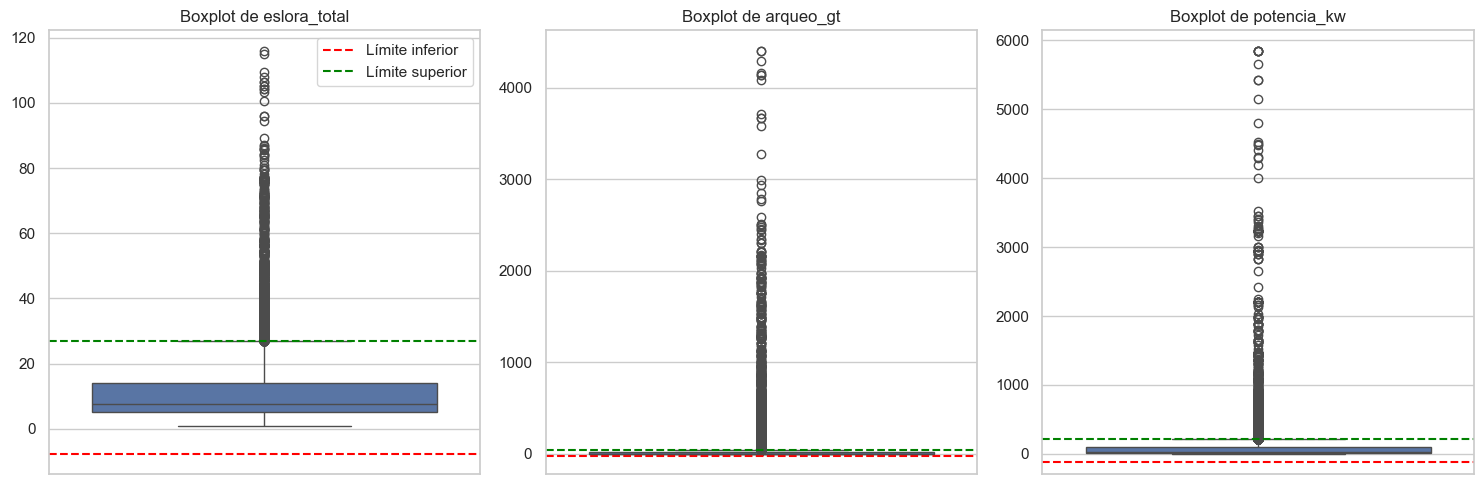

In [61]:
# Selección de columnas numéricas
numeric_cols = ['eslora_total', 'arqueo_gt', 'potencia_kw']

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(15, 5))

# Crear un boxplot para cada variable con líneas del IQR
for i, col in enumerate(numeric_cols):
    # Calcular los cuartiles y el IQR
    Q1 = data_imputed[col].quantile(0.25)
    Q3 = data_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Crear boxplot
    sns.boxplot(y=data_imputed[col], ax=axes[i])
    axes[i].axhline(lower_bound, color='red', linestyle='--', label='Límite inferior')
    axes[i].axhline(upper_bound, color='green', linestyle='--', label='Límite superior')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    # Añadir leyenda solo al primer gráfico
    if i == 0:
        axes[i].legend()

plt.tight_layout()

fig.savefig("../figures/boxplots_outliers.png")


plt.show()


### **4.2. Eliminación de columnas no relevantes**
Se eliminaron las columnas 'IMO', 'IRCS', 'matricula', 'estado', 'potencia', 'puerto_base', 'admin_registro', 'censo_modalidad', 'capacidad_no_aportable', 'tipo_auxiliar' y 'Código Postal' por no aportar información relevante para el análisis actual.


In [62]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['IMO', 'IRCS','matricula', 'estado', 'potencia', 'puerto_base', 'admin_registro', 'censo_modalidad', 'capacidad_no_aportable', 'tipo_auxiliar', 'Código Postal']

# Eliminar las columnas del DataFrame
data_1 = data_imputed.drop(columns=columnas_a_eliminar)

## **5. Enriquecimiento y análisis exploratorio inicial**
### **5.1. Creación de la variable ‘edad_buque’**
La variable ‘edad_buque’ ha sido creada con el objetivo de calcular la antigüedad de cada embarcación desde su fecha de alta en el registro hasta su fecha de baja definitiva (si aplica) o hasta la fecha actual, en caso de que siga activa. Esta variable permite analizar la edad operativa de los buques, clave para estudios del ciclo de vida o posibles reemplazos. 


In [63]:
# Fecha de hoy
hoy = pd.to_datetime("today").normalize()

# Crear la columna Edad_buque según el estado del buque
data_1['Edad_buque'] = data_1.apply(
    lambda row: (row['fc_estado'] - row['fc_alta_rgfp']).days // 365
    if row['estado_rgfp'] == 'Baja Definitiva'
    else (hoy - row['fc_alta_rgfp']).days // 365,
    axis=1
)

# Verificación
data_1[
    (data_1['estado_rgfp'].str.contains('Alta', case=False)) &
    (data_1['fc_alta_rgfp'] != data_1['fc_estado'])
]

,cfr,nombre,fc_alta_rgfp,eslora_total,arqueo_gt,material_casco,potencia_kw,estado_rgfp,fc_estado,Puerto,Provincia,Comunidad Autónoma,Tipo de Arte,Edad_buque
420,ESP000000514,CELSO,1989-05-10,5.70,0.94,Madera,6.99,Alta Definitiva,2023-03-31,Tazacorte,Santa Cruz de Tenerife,Canarias,Artes menores,36
429,ESP000000524,SAN PEDRO,1989-05-10,10.31,4.81,Madera,29.40,Alta Definitiva,2015-12-01,Caleta del Sebo,Las Palmas,Canarias,Artes menores,36
447,ESP000000543,JUANITO,1989-05-10,7.93,2.39,Madera,8.82,Alta Definitiva,2023-01-20,Playa Blanca,Las Palmas,Canarias,Artes menores,36
448,ESP000000544,EL UNION,1989-05-10,11.79,7.41,Madera,69.85,Alta Definitiva,2024-01-12,Gran Tarajal,Las Palmas,Canarias,Artes menores,36
617,ESP000000759,EL INGLES,1989-05-10,10.80,4.39,Poliester,27.21,Alta Definitiva,2022-12-02,Agaete,Las Palmas,Canarias,Artes menores,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27357,FRA000642951,CARMINCHIN,2017-12-13,16.04,57.46,Acero,261.00,Alta Definitiva,2023-03-31,Mugia,A Coruña,Galicia,Palangre,7
27358,GBR000C18081,MAR DE BENS,2021-01-13,46.85,468.00,Acero,719.78,Alta Definitiva,2022-09-28,Vigo,Pontevedra,Galicia,Palangre,4
27359,GBR000C20512,LODAIRO,2018-10-16,86.10,4290.00,Acero,4000.00,Alta Definitiva,2019-08-06,Vigo,Pontevedra,Galicia,Arrastre,6
27362,PRT000020349,BRESO UNO,2016-11-21,23.00,131.00,Acero,261.03,Alta Definitiva,2016-12-19,Burela,Lugo,Galicia,Artes fijas,8


#### **5.1.1. Distribución de los buques por su edad**
A partir del gráfico de distribución de la edad de los buques, se observa que una parte significativa de la flota pesquera española está compuesta por buques con más de 30 años, lo que indica que muchos fueron construidos en los años 80. Sin embargo, también se aprecia una presencia notable de buques más recientes, especialmente en tramos de 0 a 10 años, lo que sugiere procesos de renovación. Estos datos permiten inferir que, aunque la flota ha envejecido, ha habido cierta modernización en las últimas décadas.   

Las variaciones en el número de nuevos buques pueden estar relacionadas con eventos como la adhesión de España a la Comunidad Económica Europea en 1986 y la consiguiente adaptación a la Política Pesquera Común, que impulsó planes de reducción de flota y subvenciones para el desguace de buques (Europa-azul). Además, las reformas de la PPC y las restricciones medioambientales y económicas posteriores, como la crisis de 2008, podrían haber limitado la incorporación de nuevas unidades.


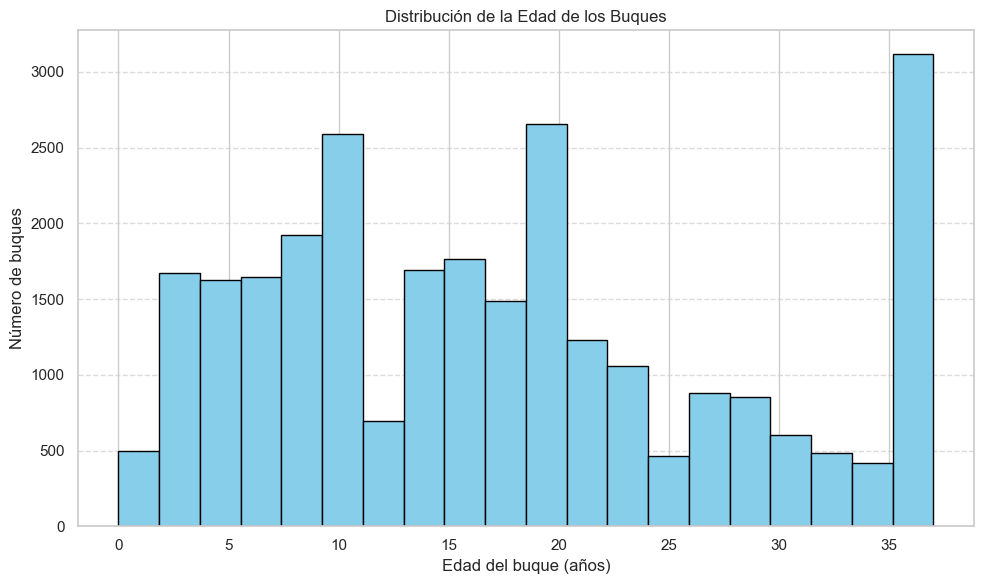

In [64]:
# Histograma de la edad de los buques
plt.figure(figsize=(10, 6))
plt.hist(data_1['Edad_buque'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución de la Edad de los Buques')
plt.xlabel('Edad del buque (años)')
plt.ylabel('Número de buques')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../figures/histogramas_edadbuque.png")

plt.show()

### **5.2. Evolución temporal de la eslora, arqueo y potencia de los buques**
El gráfico muestra la evolución de las características físicas de la flota pesquera española (eslora, arqueo y potencia) a lo largo del tiempo, representadas en función de la edad de los buques. En términos generales, se observa que los buques más nuevos (menor edad) tienden a tener una eslora y arqueo ligeramente superiores, lo que indica una tendencia hacia embarcaciones algo más grandes y con mayor capacidad de carga. Sin embargo, es la potencia la que muestra más variabilidad, con picos elevados entre los buques más recientes, lo que sugiere una modernización orientada al rendimiento y la eficiencia operativa. Esta evolución puede estar relacionada con avances tecnológicos y con regulaciones que favorecen una flota más especializada y adaptada a las exigencias actuales del sector. Por ejemplo, el aumento de la potencia auxiliar permitió en 2008 el uso de redes más grandes, haciendo posible la pesca a grandes profundidades (Eur-lex-europa). Esta serie de subvenciones se podrían ver reflejadas en el pico más alto del gráfico para la potencia.


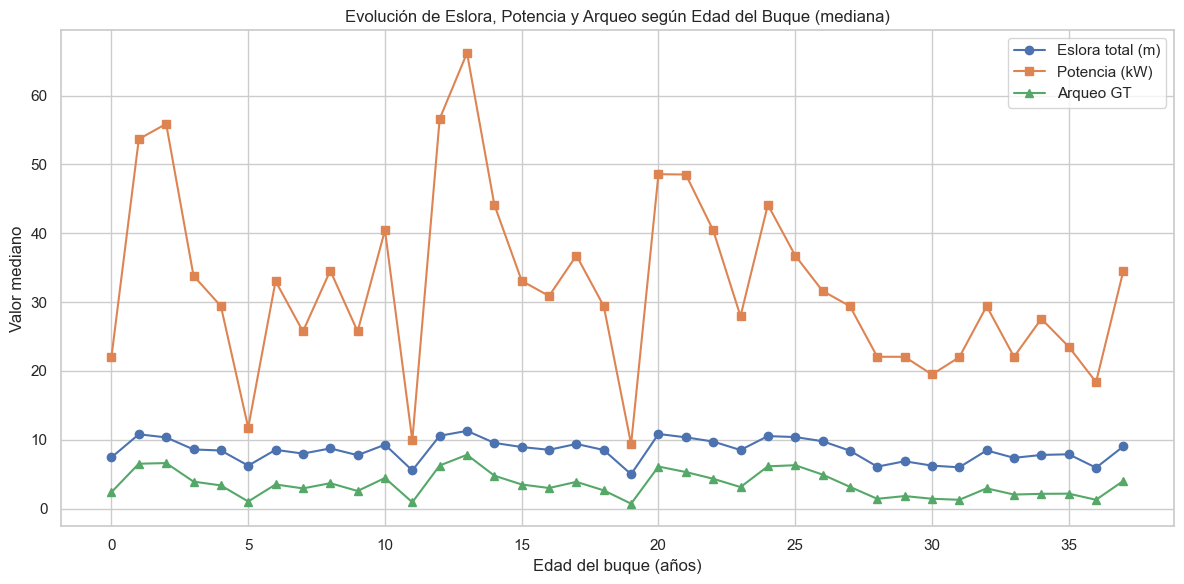

In [65]:
# Agrupar por edad del buque y calcular la mediana
df_median = data_1.groupby('Edad_buque')[['eslora_total', 'potencia_kw', 'arqueo_gt']].median().reset_index()

# Estilo gráfico
sns.set(style='whitegrid')

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_median['Edad_buque'], df_median['eslora_total'], label='Eslora total (m)', marker='o')
plt.plot(df_median['Edad_buque'], df_median['potencia_kw'], label='Potencia (kW)', marker='s')
plt.plot(df_median['Edad_buque'], df_median['arqueo_gt'], label='Arqueo GT', marker='^')

# Añadir títulos y leyenda
plt.title('Evolución de Eslora, Potencia y Arqueo según Edad del Buque (mediana)')
plt.xlabel('Edad del buque (años)')
plt.ylabel('Valor mediano')
plt.legend()
plt.tight_layout()
plt.savefig("../figures/lineplot_evolucion_esl-arq-pot.png")

plt.show()


### **5.3. Evolución temporal del tipo de material del casco**
El gráfico muestra la evolución del tipo de material del casco a lo largo del tiempo, se observa como en los buques de una edad desde 0 a 20 años predominan los cascos de madera. A partir de los 20 años hay una distribución estable en el tipo de material hasta los buques de 35 años, en los que predomina el poliester. El resto de materiales usados para construir los buques se mantiene estable a lo largo del tiempo.  

Podemos observar como en los picos más altos de cantidad de buques con un casco de madera, los que tienen una edad aproximada de 12, 19 y 36 años, coinciden con los momentos en los que la potencia, eslora y arqueo medianos de los buques disminuyen, lo que indica que esa cantidad de buques con casco de madera registrados en ese momento son buques de pequeña capacidad.


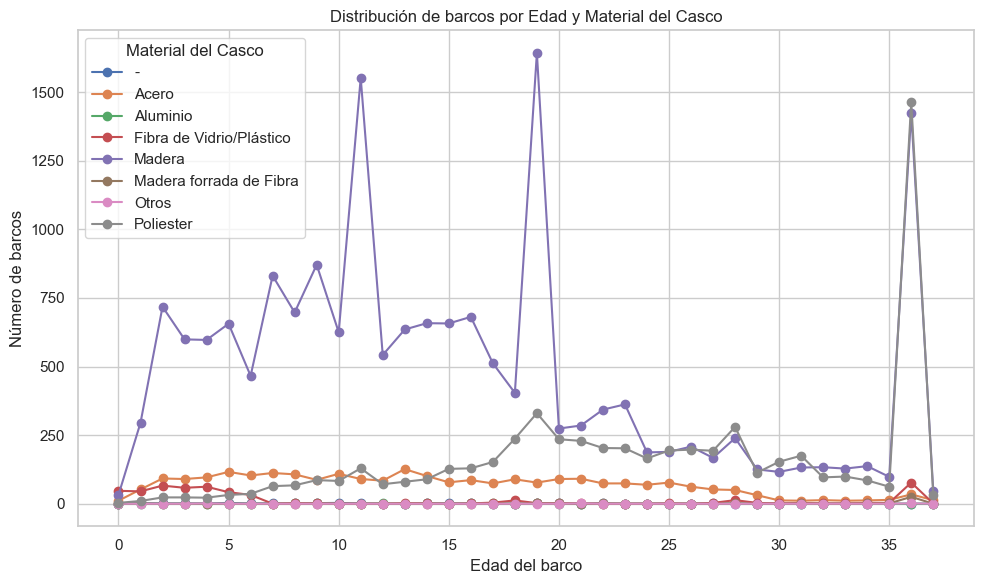

In [66]:
conteo = data_1.groupby(["Edad_buque", "material_casco"]).size().unstack(fill_value = 0)

plt.figure(figsize=(10, 6))

for material in conteo.columns:
    plt.plot(conteo.index, conteo[material], marker='o', label=material)

plt.xlabel('Edad del barco')
plt.ylabel('Número de barcos')
plt.title('Distribución de barcos por Edad y Material del Casco')
plt.legend(title='Material del Casco')
plt.grid(True)
plt.tight_layout()

plt.savefig("../figures/lineplot_evolucion_material_casco.png")
plt.show()

### **5.4. Distribución en las columnas numéricas**
Los siguientes tres histogramas correspondientes a las variables ‘eslora_total’, ‘arqueo_gt’ y ‘potencia_kw’, muestran distribuciones fuertemente sesgadas hacia la derecha. En el primer gráfico, la mayoría de las embarcaciones tienen una ‘eslora_total’ entre 0 y 20 metros, con un pico entre 5 y 10 metros y una larga cola que alcanza los 120 metros. El ‘arqueo_gt’, que representa el volumen interno, también se concentra en valores bajos (principalmente debajo de 500 GT) con algunos valores atípicos que superan los 4000 GT. De forma similar, la ‘potencia_kw’ se agrupa mayoritariamente por debajo de los 500 kW, aunque existen casos que superan los 6000 kW. Estas distribuciones indican una predominancia de embarcaciones pequeñas o medianas, con algunos pocos casos extremos, posteriormente se aplicaran transformaciones como la logarítmica, útiles para los análisis.


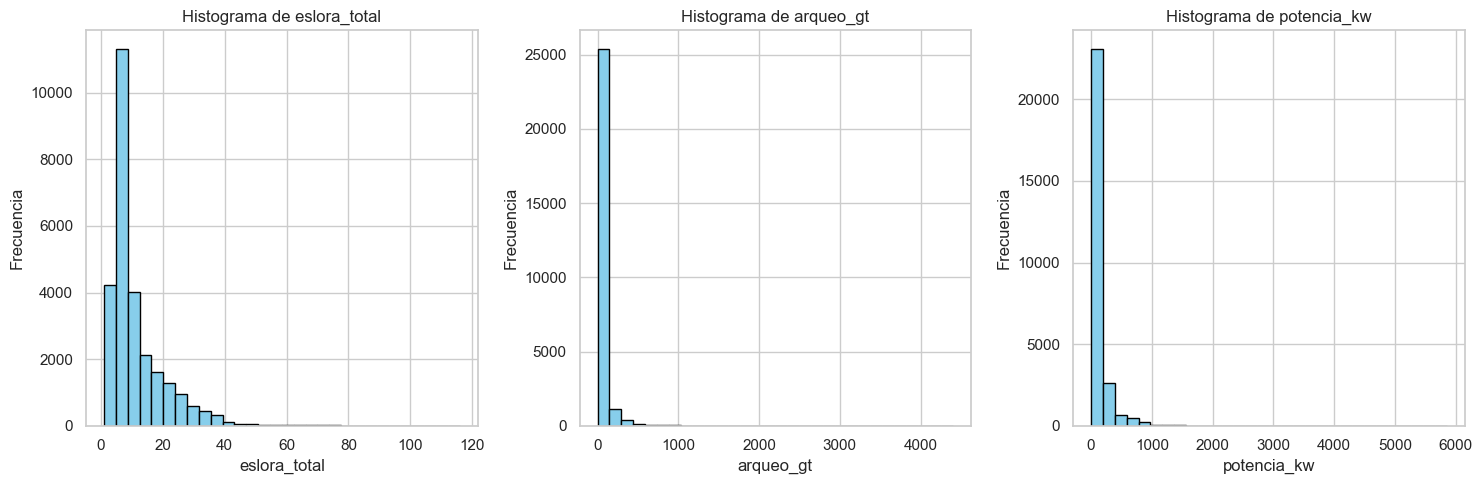

In [67]:
# Selección de columnas numéricas
numeric_cols = ['eslora_total', 'arqueo_gt', 'potencia_kw']

# Crear histogramas para cada variable
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    axes[i].hist(data_1[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()

# Guardar figura
fig.savefig("../figures/histogramas_frecuencias_esl-arq-pot.png")

plt.show()


### **5.5. Correlaciones**
La matriz de correlación muestra relaciones fuertes y positivas entre las tres variables numéricas analizadas:
‘Eslora total’ y ‘arqueo_gt’ tienen una correlación de aproximadamente 0.80, lo que indica que a medida que aumenta la eslora (longitud) del buque, también tiende a aumentar su arqueo (tonelaje). Esto es esperable porque barcos más largos suelen tener mayor capacidad o peso.  

‘Eslora total’ y ‘potencia_kw’ presentan una correlación aún más alta, alrededor de 0.87, lo que sugiere que buques más largos también suelen contar con motores de mayor potencia, reflejando la necesidad de impulsar embarcaciones de mayor tamaño.
La relación entre ‘arqueo_gt’ y ‘potencia_kw’ es la más fuerte, con un valor de 0.94, lo que indica que el peso o volumen del buque está muy ligado a la potencia instalada. Esto es coherente, pues un mayor arqueo implica barcos más pesados que requieren motores más potentes para su operación eficiente.  

En conjunto, estas correlaciones confirman que las variables están estrechamente relacionadas y reflejan dimensiones físicas y de rendimiento del buque que crecen conjuntamente. Esta consistencia también respalda la calidad de la imputación, ya que mantiene las relaciones naturales esperadas entre estas características.


              eslora_total  arqueo_gt  potencia_kw
eslora_total      1.000000   0.799462     0.870160
arqueo_gt         0.799462   1.000000     0.940737
potencia_kw       0.870160   0.940737     1.000000


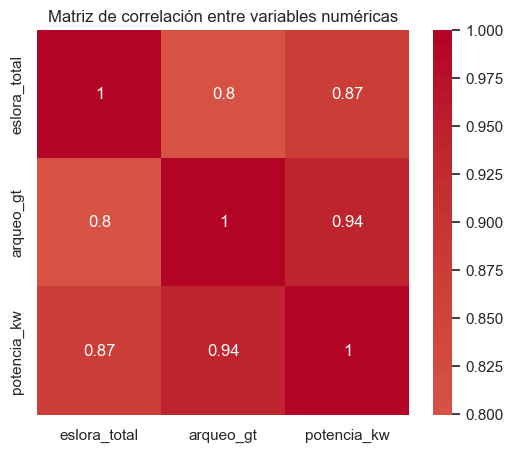

In [68]:
# Seleccionamos las columnas numéricas para la correlación
numeric_cols = ['eslora_total', 'arqueo_gt', 'potencia_kw']

# Calculamos la matriz de correlación (Pearson por defecto)
corr_matrix = data_imputed[numeric_cols].corr()

# Mostramos la matriz
print(corr_matrix)

# Visualizamos con un heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')

# Guardar figura
plt.savefig("../figures/correlacion_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

## **Extra. Resumen estadistico del dataframe limpio**

In [69]:
def describe_df(data):
    """
    Proporciona un resumen del DataFrame, incluyendo forma, tipos de datos, estadísticas básicas,
    conteo de valores nulos y rangos de fechas para columnas datetime.

    :param data: DataFrame de pandas.
    :return: DataFrame con el resumen del DataFrame dado.
    """
    summary = pd.DataFrame({
        'Column': data.columns,
        'Data Type': data.dtypes,
        'Null Count': data.isnull().sum(),
        'Unique Values': data.nunique()
    }).reset_index(drop=True)

    summary['Data Type'] = summary['Data Type'].astype(str)
    summary['Shape'] = f"{data.shape[0]} rows, {data.shape[1]} columns"

    # Estadísticas para columnas numéricas
    numeric_cols = data.select_dtypes(include=['number']).columns
    if not numeric_cols.empty:
        numeric_stats = data[numeric_cols].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
        summary = summary.merge(numeric_stats, left_on='Column', right_index=True, how='left')

    # Estadísticas para columnas de tipo datetime
    datetime_cols = data.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns
    if not datetime_cols.empty:
        date_stats = data[datetime_cols].agg(['min', 'max']).T
        date_stats.columns = ['Date Min', 'Date Max']
        summary = summary.merge(date_stats, left_on='Column', right_index=True, how='left')

    return summary

In [70]:
stats_data_1 = describe_df(data_1)
stats_data_1

,Column,Data Type,Null Count,Unique Values,Shape,mean,std,min,25%,50%,75%,max,Date Min,Date Max
0,cfr,object,0,27364,"27364 rows, 14 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,nombre,object,0,19587,"27364 rows, 14 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,fc_alta_rgfp,datetime64[ns],0,2538,"27364 rows, 14 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987-12-31,2025-03-25
3,eslora_total,float64,0,3922,"27364 rows, 14 columns",11.500929,9.855268,1.00,5.35,7.60,14.00,116.00,NaT,NaT
4,arqueo_gt,float64,0,6852,"27364 rows, 14 columns",45.457420,179.324009,0.10,0.94,2.30,18.01,4406.00,NaT,NaT
5,material_casco,object,0,8,"27364 rows, 14 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
6,potencia_kw,float64,0,3025,"27364 rows, 14 columns",107.844788,262.286150,0.74,10.30,22.06,94.14,5851.63,NaT,NaT
7,estado_rgfp,object,0,4,"27364 rows, 14 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
8,fc_estado,datetime64[ns],0,5055,"27364 rows, 14 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987-12-31,2025-04-02
9,Puerto,object,0,287,"27364 rows, 14 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [71]:
# Guardar el dataframe estadisticas
stats_data_1.to_csv("../output/EstadisticasDescriptivas.csv", index= False)

# Guardar el dataframe resultante
data_1.to_csv("../data/data_clean_v2.csv", index= False)

## **6. Análisis de los datos**
### **6.1. Aplica un modelo supervisado y uno no supervisado a los datos y comenta los resultados obtenidos**
### **6.2. Aplica una prueba por contraste de hipótesis. Ten en cuenta que algunas de estas pruebas requieren verificar previamente la normalidad y homocedasticidad de los datos.**

## Durante apartados. Representación de los resultados a partir de tablas y gráficas. Este apartado se puede responder a lo largo de la práctica, sin necesidad de concentrar todas las representaciones en este apartado. Se debe representar tanto el contenido del dataset para observar las proporciones y distribuciones de las diferentes variables una vez aplicada la etapa de limpieza, como los resultados obtenidos tras la etapa de análisis.

## **7. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?**


## **8. Código. Hay que adjuntar el código, preferiblemente en R, con el que se ha realizado la limpieza, análisis y representación de los datos. Si lo preferís, también podéis trabajar en Python.**

El codigo se encuentra en el repositorio bla bla bla.


## **8. Vídeo. Realizar un breve vídeo explicativo de la práctica (máximo 10 minutos), donde ambos integrantes del equipo expliquen con sus propias palabras el desarrollo de la práctica, basándose en las preguntas del enunciado para justificar y explicar el código desarrollado. Este vídeo se deberá entregar a través de un enlace al Google Drive de la UOC (https://drive.google.com/…), junto con enlace al repositorio Git entregado.**